import seaborn as sns

In [2]:
tips=sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


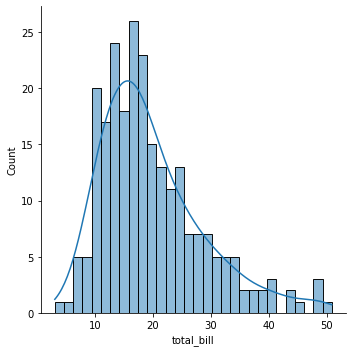

In [11]:
sns.displot(tips["total_bill"],kde=True,bins=30)

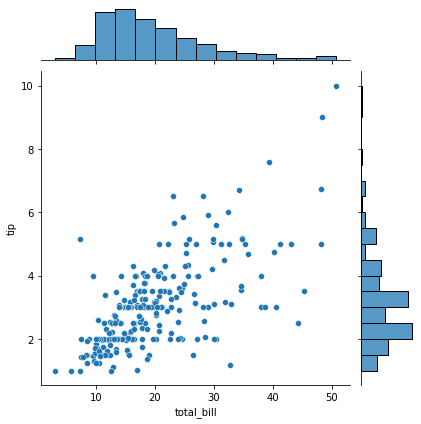

In [13]:
sns.jointplot(x="total_bill",y="tip",data=tips)

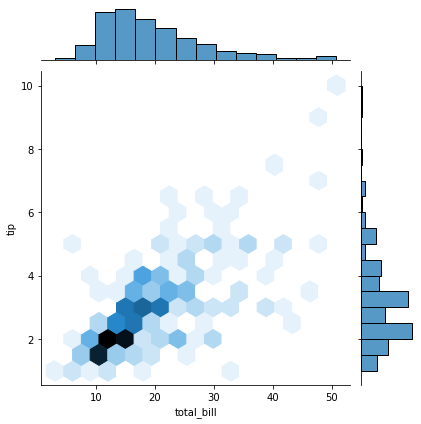

In [15]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="hex")

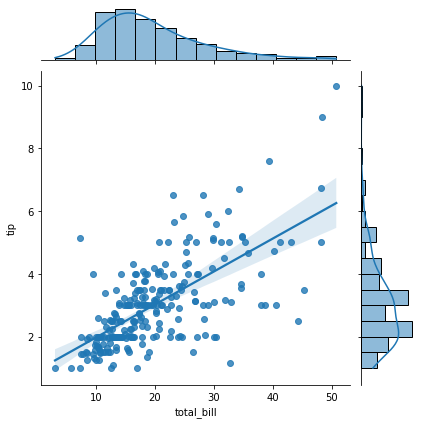

In [16]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="reg")

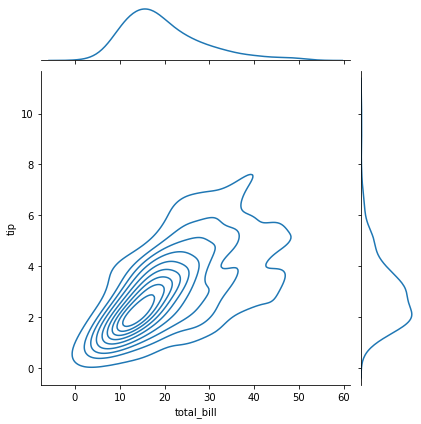

In [17]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="kde")

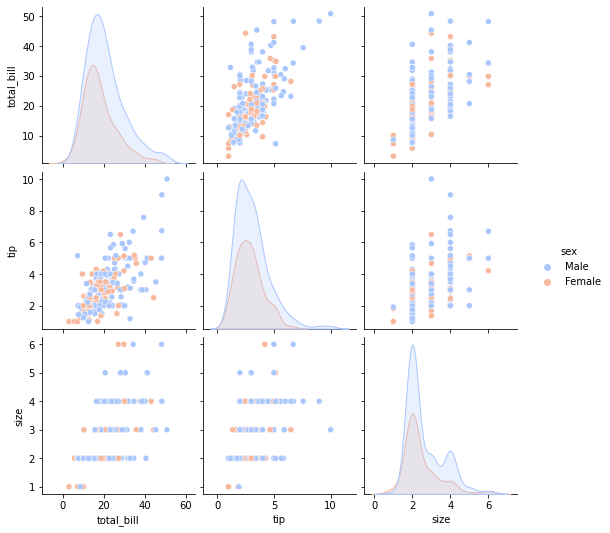

In [20]:
sns.pairplot(tips,hue="sex",palette="coolwarm")

<AxesSubplot:xlabel='total_bill'>

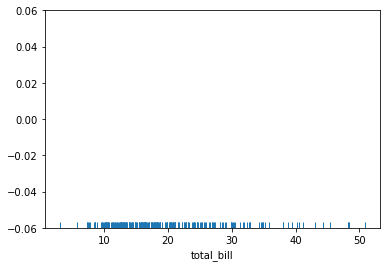

In [21]:
#ugplots thực sự là một khái niệm rất đơn giản, 
#chúng chỉ vẽ một dấu gạch ngang cho mọi điểm trên một phân phối đơn biến. 
#Chúng là khối xây dựng của một âm mưu KDE:
sns.rugplot(tips["total_bill"])

(0.0, 1.0)

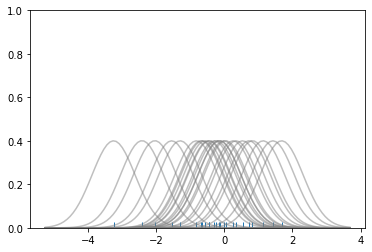

In [26]:
#kdeplots are Kernel Density Estimation plots. 
#kernel density estimate plots replace every single observation with a Gaussian (Normal) distribution centered around that value.
#Biểu đồ ước tính mật độ hạt nhân (KDE) là một phương pháp để trực quan hóa 
#sự phân bố của các quan sát trong tập dữ liệu, tương ứng với biểu đồ. 
#KDE biểu diễn dữ liệu bằng cách sử dụng đường cong mật độ xác suất liên tục trong một hoặc nhiều thứ nguyên.
#Phân phối chuẩn (Normal distribution)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

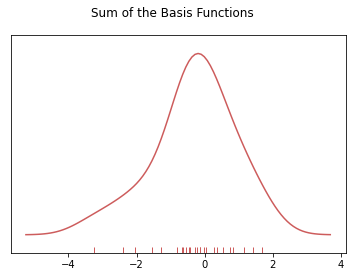

In [28]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='tip', ylabel='Density'>

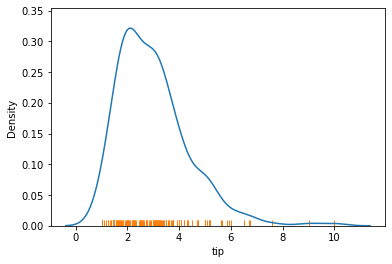

In [29]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])